In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

In [2]:
pkl_file = open('./char74.pkl', 'rb')
data_reload = pickle.load(pkl_file)
pkl_file.close()

images = data_reload['X']
labels = data_reload['y']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size = 0.2)

In [21]:
X_train = np.expand_dims(X_train, 3)

X_val = np.expand_dims(X_val, 3)

## create mapping

In [25]:
import string
nums = list(string.digits)
upper = list(string.ascii_uppercase)
lower = list(string.ascii_lowercase)
classes = nums + upper + lower

mapping = {}
for i, value in enumerate(classes):
    mapping[i] = value
    pass

## visualize dataset

In [26]:
import matplotlib.pyplot as plt

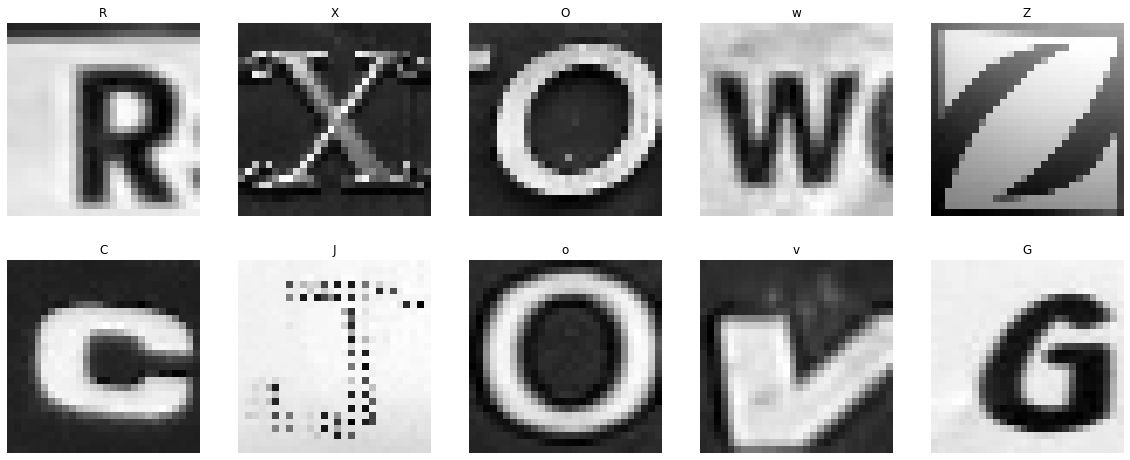

In [42]:
random_draw = np.random.randint(0, X_train.shape[0], 10)

plt.figure(figsize = (20, 8))
ind = 1
for i in random_draw:
    plt.subplot(2, 5, ind)
    plt.imshow(X_train[i].reshape(28, 28), cmap = 'gray')
    plt.title('{}'.format(mapping[y_train[i]]))
    plt.axis('off')
    ind += 1
    pass
plt.show()

## create dataset

In [28]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [29]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## train model

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (28, 28, 1), name = '1st_conv'),
    tf.keras.layers.AveragePooling2D(2, 2, name = '1st_pooling'),
    tf.keras.layers.Conv2D(16, (5, 5), activation = 'relu', name = '2nd_conv'),
    tf.keras.layers.AveragePooling2D(2, 2, name = '2nd_pooling'),
    tf.keras.layers.Flatten(name = 'flatten'),
    tf.keras.layers.Dropout(0.5, name = '1st_dropout'),
    tf.keras.layers.Dense(120,activation='relu', name = '1st_fc'),
    tf.keras.layers.Dense(84,activation='relu', name = '2nd_fc'),
    tf.keras.layers.Dense(62, name = '3rd_fc')
])

In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_conv (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
1st_pooling (AveragePooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
2nd_conv (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
2nd_pooling (AveragePooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
1st_dropout (Dropout)        (None, 256)               0         
_________________________________________________________________
1st_fc (Dense)               (None, 120)              

In [75]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

callbacks = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_sparse_categorical_accuracy', 
    patience = 10, 
    mode = 'auto'
)

In [76]:
model.fit(
    train_dataset,
    epochs=50,
    callbacks = [callbacks],
    validation_data=test_dataset,
)

Epoch 1/50
97/97 [==============================] - 2s 16ms/step - loss: 3.8901 - sparse_categorical_accuracy: 0.0537 - val_loss: 3.8021 - val_sparse_categorical_accuracy: 0.0948
Epoch 2/50
97/97 [==============================] - 2s 16ms/step - loss: 3.7978 - sparse_categorical_accuracy: 0.0718 - val_loss: 3.7350 - val_sparse_categorical_accuracy: 0.0929
Epoch 3/50
97/97 [==============================] - 2s 17ms/step - loss: 3.6436 - sparse_categorical_accuracy: 0.1282 - val_loss: 3.2700 - val_sparse_categorical_accuracy: 0.2422
Epoch 4/50
97/97 [==============================] - 1s 15ms/step - loss: 3.0957 - sparse_categorical_accuracy: 0.2589 - val_loss: 2.5806 - val_sparse_categorical_accuracy: 0.3545
Epoch 5/50
97/97 [==============================] - 2s 16ms/step - loss: 2.5833 - sparse_categorical_accuracy: 0.3516 - val_loss: 2.1279 - val_sparse_categorical_accuracy: 0.4429
Epoch 6/50
97/97 [==============================] - 2s 16ms/step - loss: 2.2825 - sparse_categorical_accu

## data augmentation

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [84]:
model_aug = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (28, 28, 1), name = '1st_conv'),
    tf.keras.layers.AveragePooling2D(2, 2, name = '1st_pooling'),
    tf.keras.layers.Conv2D(16, (5, 5), activation = 'relu', name = '2nd_conv'),
    tf.keras.layers.AveragePooling2D(2, 2, name = '2nd_pooling'),
    tf.keras.layers.Flatten(name = 'flatten'),
    tf.keras.layers.Dropout(0.5, name = '1st_dropout'),
    tf.keras.layers.Dense(120,activation='relu', name = '1st_fc'),
    tf.keras.layers.Dense(84,activation='relu', name = '2nd_fc'),
    tf.keras.layers.Dense(62, name = '3rd_fc')
])

model_aug.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

callbacks = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_sparse_categorical_accuracy', 
    patience = 10, 
    mode = 'auto'
)

In [86]:
model_aug.fit(
    train_datagen.flow(X_train, y_train, batch_size = 128),
    steps_per_epoch= X_train.shape[0] / 128,
    epochs=200,
#     callbacks = [callbacks],
    validation_data=test_dataset,
)

Epoch 1/200
49/48 [==============================] - 2s 47ms/step - loss: 2.7854 - sparse_categorical_accuracy: 0.2716 - val_loss: 2.0358 - val_sparse_categorical_accuracy: 0.4006
Epoch 2/200
49/48 [==============================] - 2s 47ms/step - loss: 2.7912 - sparse_categorical_accuracy: 0.2612 - val_loss: 2.0107 - val_sparse_categorical_accuracy: 0.4455
Epoch 3/200
49/48 [==============================] - 2s 46ms/step - loss: 2.7776 - sparse_categorical_accuracy: 0.2656 - val_loss: 2.0004 - val_sparse_categorical_accuracy: 0.4175
Epoch 4/200
49/48 [==============================] - 2s 49ms/step - loss: 2.7594 - sparse_categorical_accuracy: 0.2735 - val_loss: 1.9782 - val_sparse_categorical_accuracy: 0.4338
Epoch 5/200
49/48 [==============================] - 2s 50ms/step - loss: 2.7735 - sparse_categorical_accuracy: 0.2687 - val_loss: 1.9980 - val_sparse_categorical_accuracy: 0.4351
Epoch 6/200
49/48 [==============================] - 2s 47ms/step - loss: 2.7712 - sparse_categorica